# Prediction Prototype Algorithm


In [254]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys


## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model
from sklearn.decomposition import PCA

In [255]:
## PCA Decomposition Configuration
pca = PCA(n_components=2)

## Utility Functions

In [256]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y)]
    colors = ("red", "green", "blue","yellow","purple","black","magenta","cyan")
    groups = ("Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8")

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors, groups):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow","purple","black","magenta","cyan"]
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

   Feature1  Feature2  Feature3  Cluster
0  0.194304  0.594199  0.327570      0.0
1  0.212414  0.582091  0.919185      0.0
2  0.855400  0.045053  0.914117      1.0
3  0.434628  0.100153  0.366216      1.0
4  0.252967  0.174123  0.407988      0.0
5  0.169939  0.000103  0.280219      0.0
6  0.267898  0.668000  0.956950      0.0
7  0.512079  0.044659  0.800758      0.0
8  0.499403  0.180988  0.788301      0.0
9  0.359963  0.236956  0.590499      1.0


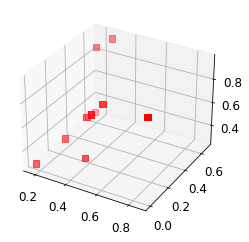

In [257]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

v = np.random.rand(10,4)
v[:,3] = np.random.randint(0,2,size=10)
df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
print (df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Feature1'])
y = np.array(df['Feature2'])
z = np.array(df['Feature3'])

ax.scatter(x,y,z, marker="s", c='red', s=40) #cmap="RdBu")

plt.show()

# Creating Data Frames for Already Processed DataSets

In [258]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise_Descreet = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')

## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.drop(['Unnamed: 0'],axis=1)

## 1. Covid_19_Countires_Wise Analysis

## Data Preprocessing

In [259]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]
print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [8021 7627 230]
 [8036 7632 230]
 [8055 7640 231]]
267


## Creating Time Series model

In [260]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = 15         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 


#val123  # Unocment to diplay the frame structure



  completed Succesfully 


In [261]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
#print(val[:,[2]].astype(np.int))    
#print(val[:,[2]].astype(np.int)*w1)
#val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [262]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
# val123 # Uncomment to view frame structure

## Visualize Covid-19 Time Series Predictions

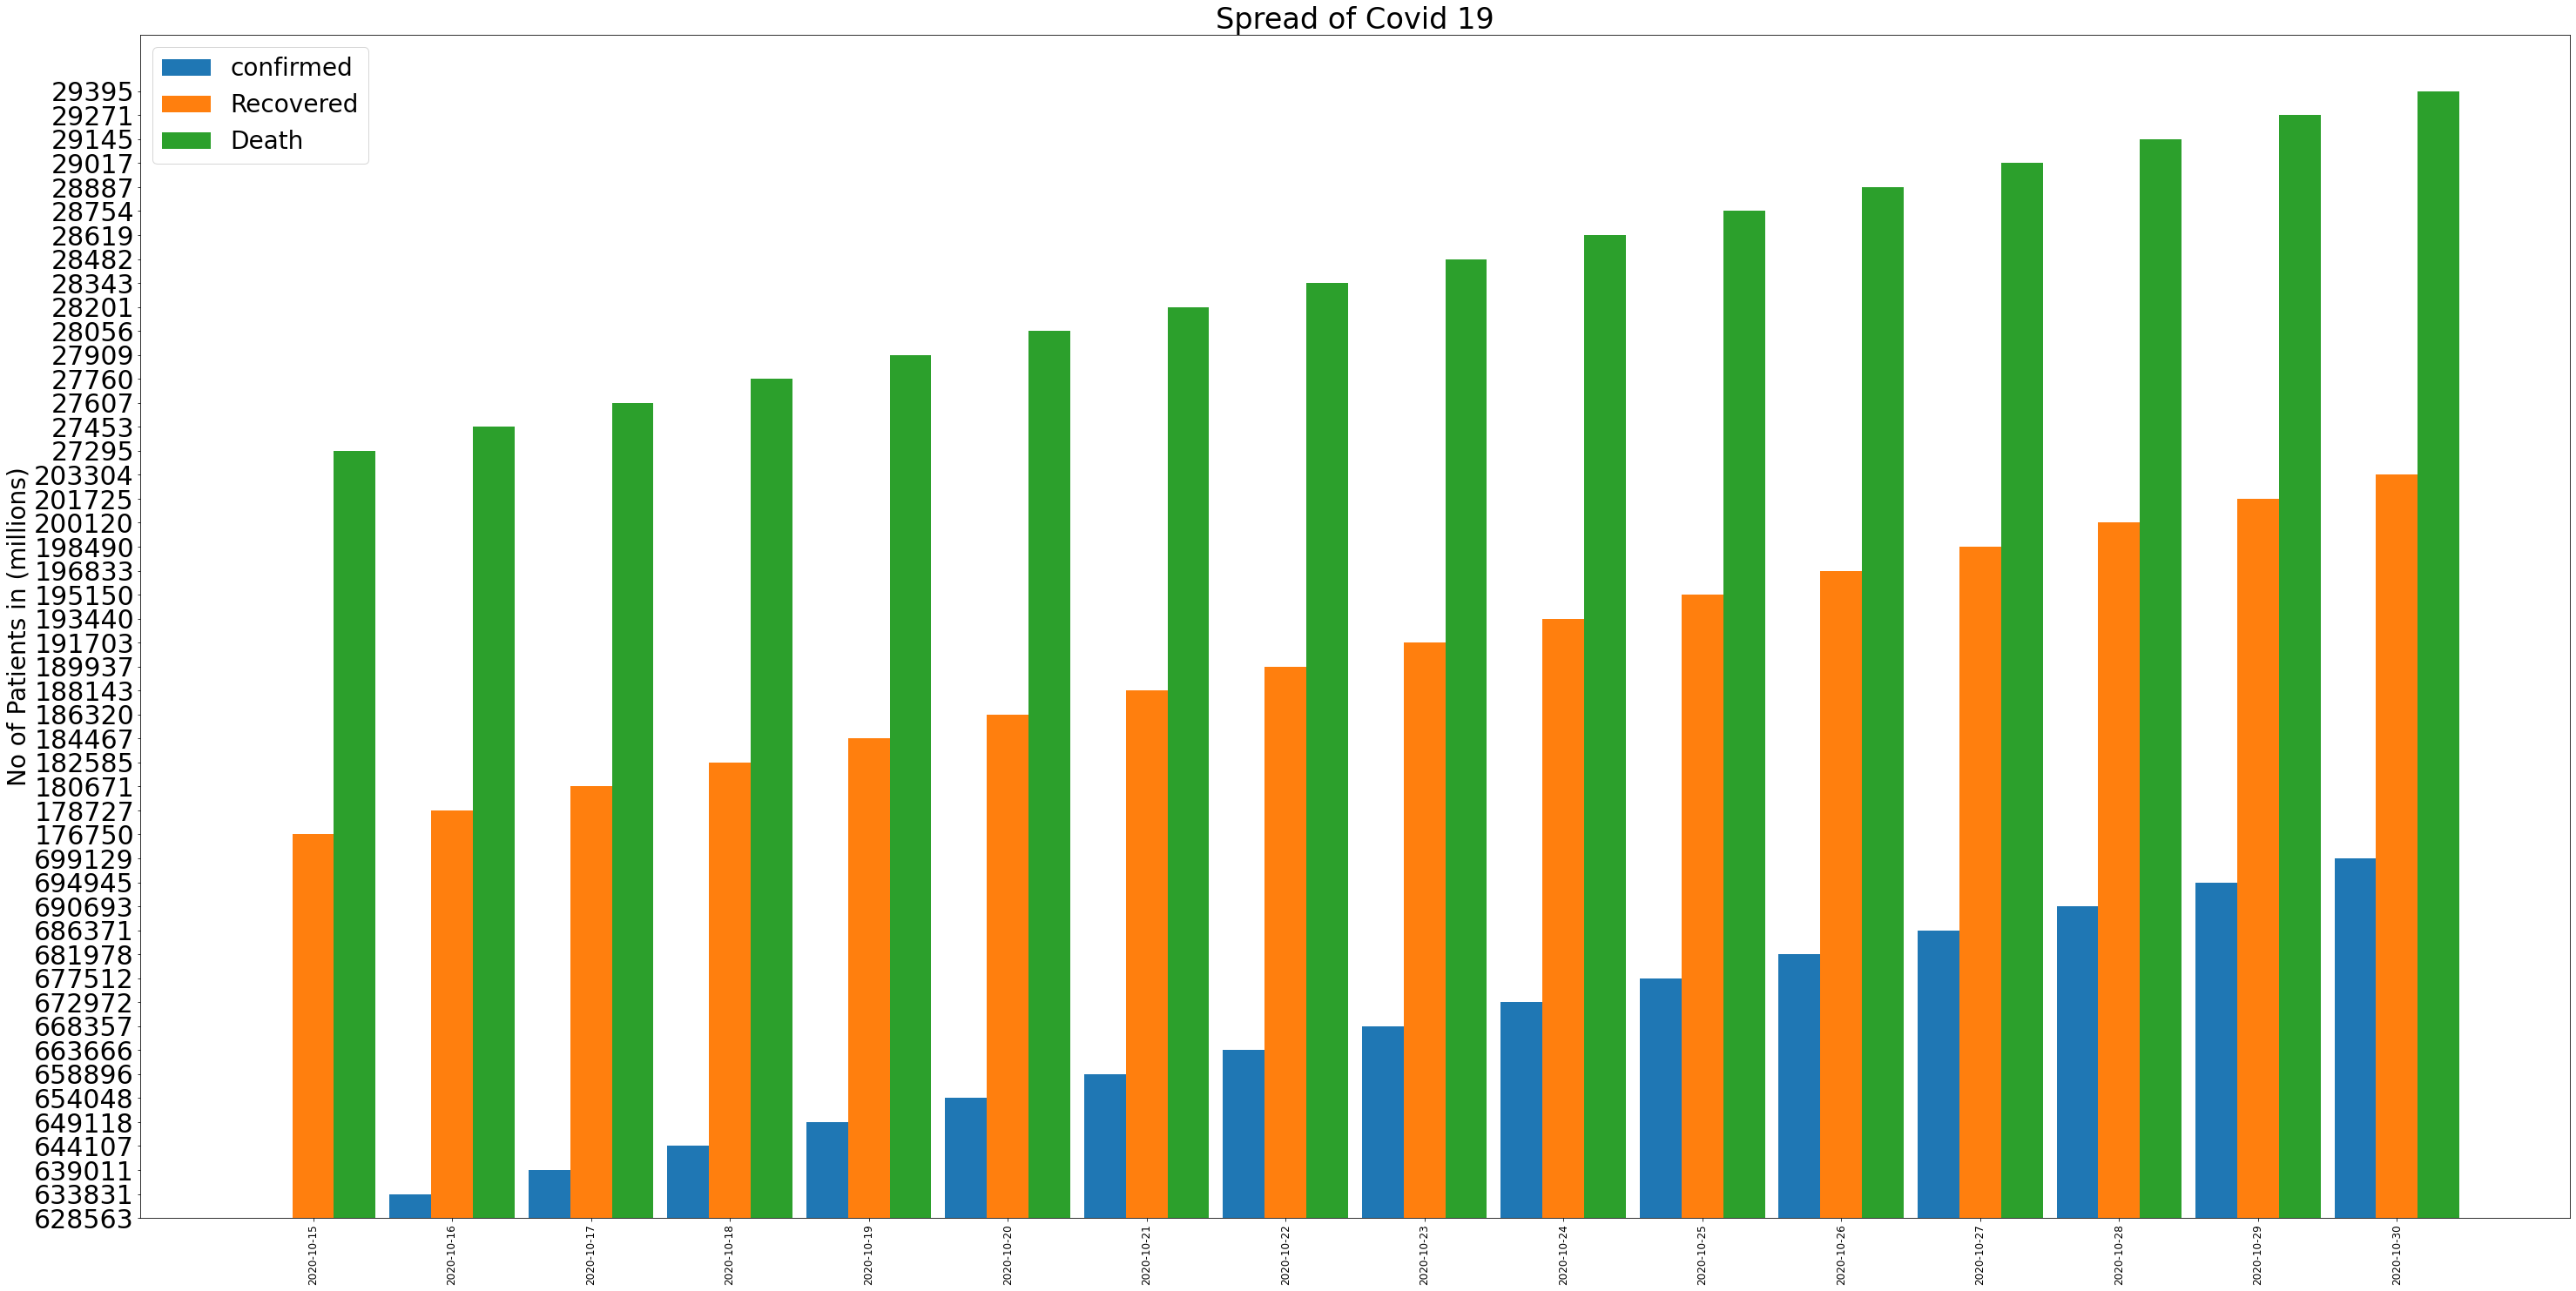

In [263]:
#print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm

In [264]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
#US

In [265]:
Complete_Data


,Date,Country,Confirmed,Recovered,Deaths
0,2020-10-15,Comoros,42,33,0
1,2020-10-16,Comoros,42,33,0
2,2020-10-17,Comoros,42,34,0
3,2020-10-18,Comoros,43,34,0
4,2020-10-19,Comoros,43,34,0
...,...,...,...,...,...
3019,2020-10-26,Kenya,2294,1148,43
3020,2020-10-27,Kenya,2318,1163,44
3021,2020-10-28,Kenya,2341,1177,44
3022,2020-10-29,Kenya,2364,1192,44


In [266]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])



[['Afghanistan' '4923' '2551' '142']
 ['Italy' '64667' '37690' '8774']
 ['Kuwait' '9019' '6978' '61']
 ['India' '229887' '163698' '4680']
 ['South Africa' '45436' '32281' '888']
 ['US' '665199' '190522' '28387']
 ['United Kingdom' '65653' '312' '8897']
 ['Sri Lanka' '430' '310' '2']
 ['Chile' '46287' '38452' '1016']
 ['Norway' '2491' '1335' '60']
 ['New Zealand' '422' '352' '4']
 ['Switzerland' '9216' '7202' '489']
 ['Australia' '2971' '2148' '46']
 ['Canada' '23075' '14917' '1656']
 ['China' '36537' '29258' '1682']
 ['Slovenia' '509' '300' '27']
 ['North Macedonia' '1390' '848' '62']]


# Selecting the population of the countries under consideration  

In [267]:
Population_Data_Countires_Wise_Descreet

,LocID,Country,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,2020,2020.5,19976.265,18952.076,38928.341,59.627
1,903,Africa,2,Medium,2020,2020.5,669878.340,670719.773,1340598.113,45.216
2,1823,African Group,2,Medium,2020,2020.5,668995.562,669831.029,1338826.591,45.571
3,1560,African Union,2,Medium,2020,2020.5,669307.822,670116.099,1339423.921,45.182
4,2080,African Union: Central Africa,2,Medium,2020,2020.5,79260.910,79358.728,158619.638,30.066
...,...,...,...,...,...,...,...,...,...,...
472,900,World,2,Medium,2020,2020.5,3929973.953,3864824.776,7794798.729,59.917
473,1801,World Bank Regional Groups (developing only),2,Medium,2020,2020.5,3299567.992,3229194.235,6528762.227,71.088
474,887,Yemen,2,Medium,2020,2020.5,15024.985,14800.983,29825.968,56.492
475,894,Zambia,2,Medium,2020,2020.5,9103.006,9280.950,18383.956,24.730


In [268]:
# Covid countries population Data 
Complete_Data_pop = Population_Data_Countires_Wise_Descreet
Complete_Data_pop = np.array(Complete_Data_pop)
Complete_Data_pop[:,[8,9]] = np.array(Complete_Data_pop[:,[8,9]]).astype(int)
selected_countries_pop = np.zeros(shape=(1,3)) 
data = Complete_Data_pop[:,[0,1,2,3,4,5,6,7,8,9]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data_pop = data[filter1]
    for j in range(0,len(Complete_Data_pop[:,0])):
                if(Complete_Data_pop[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data_pop[:,[2]])):
                        w1.append((len(Complete_Data_pop[:,[2]])- k)/len(Complete_Data_pop[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data_pop[:,8]))/len(Complete_Data_pop[:,[8]]))
                    val2 = ((sum(Complete_Data_pop[:,9]))/len(Complete_Data_pop[:,[9]]))
                    selected_countries_pop = np.append(selected_countries_pop,[str(i),int(val1),int(val2)])
                    selected_countries_pop = selected_countries_pop.reshape((int(len(selected_countries_pop)/3)),3)
                    break;
selected_countries_pop   = selected_countries_pop[1:,[0,1,2]]


print(selected_countries_pop[:,[0,1,2]])

[['Afghanistan' '38928' '59']
 ['Italy' '60461' '205']
 ['Kuwait' '4270' '239']
 ['India' '1380004' '464']
 ['South Africa' '59308' '48']
 ['US' '331002' '36']
 ['United Kingdom' '67886' '280']
 ['Sri Lanka' '21413' '341']
 ['Chile' '19116' '25']
 ['Norway' '5421' '14']
 ['New Zealand' '4822' '18']
 ['Switzerland' '8654' '219']
 ['Australia' '25499' '3']
 ['Canada' '37742' '4']
 ['China' '1439323' '153']
 ['Slovenia' '2078' '103']
 ['North Macedonia' '2083' '82']]


In [269]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(selected_countries)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
s_c_df

,0,1,2,3
0,Afghanistan,4923,2551,142
1,Italy,64667,37690,8774
2,Kuwait,9019,6978,61
3,India,229887,163698,4680
4,South Africa,45436,32281,888
5,US,665199,190522,28387
6,United Kingdom,65653,312,8897
7,Sri Lanka,430,310,2
8,Chile,46287,38452,1016
9,Norway,2491,1335,60


## Normalising covid data with population 


In [270]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [271]:
s_c_df = np.array(s_c_df)
selected_countries = s_c_df
selected_countries

array([['Afghanistan', 0.012646424167694204, 0.006553123715577477,
        0.00036477599671187836],
       ['Italy', 0.10695655050363045, 0.06233770529762988,
        0.014511834074858175],
       ['Kuwait', 0.2112177985948478, 0.1634192037470726,
        0.0014285714285714286],
       ['India', 0.01665842997556529, 0.011862139530030348,
        0.00033912945179869044],
       ['South Africa', 0.07661023807917988, 0.0544294193026236,
        0.0014972684966614962],
       ['US', 0.20096525096525097, 0.05755916882677447,
        0.008576081111292379],
       ['United Kingdom', 0.09671066199216334, 0.00045959402527767147,
        0.013105795009280264],
       ['Sri Lanka', 0.0020081259048241725, 0.001447718675570915,
        9.340120487554289e-06],
       ['Chile', 0.24213747645951034, 0.20115086838250684,
        0.005314919439213225],
       ['Norway', 0.04595093156244236, 0.024626452684006643,
        0.0011068068622025456],
       ['New Zealand', 0.008751555371215265, 0.0072998755703

In [272]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
print(covid_frame)
covid_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(covid_frame1)

[('Afghanistan', 0), ('Italy', 4), ('Kuwait', 1), ('India', 0), ('South Africa', 2), ('US', 3), ('United Kingdom', 5), ('Sri Lanka', 0), ('Chile', 1), ('Norway', 2), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 0), ('Canada', 2), ('China', 0), ('Slovenia', 0), ('North Macedonia', 2)]
[([0.006553123715577477], [0.00036477599671187836], 0), ([0.06233770529762988], [0.014511834074858175], 4), ([0.1634192037470726], [0.0014285714285714286], 1), ([0.011862139530030348], [0.00033912945179869044], 0), ([0.0544294193026236], [0.0014972684966614962], 2), ([0.05755916882677447], [0.008576081111292379], 3), ([0.00045959402527767147], [0.013105795009280264], 5), ([0.001447718675570915], [9.340120487554289e-06], 0), ([0.20115086838250684], [0.005314919439213225], 1), ([0.024626452684006643], [0.0011068068622025456], 2), ([0.007299875570302779], [8.295313148071339e-05], 0), ([0.08322163161543795], [0.005650566212156229], 4), ([0.008423859759206244], [0.0001803992313424056], 0), ([0.03952360

In [273]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
covid_frame1

[([-0.0745095376265721], [-0.005284825151225545], 0),
 ([0.03488703292423593], [0.005814811220482562], 4),
 ([0.1782569527722086], [-0.01718689237579337], 1),
 ([-0.06815518684176267], [-0.007258932855797026], 0),
 ([0.005379041197254398], [-0.006881107447474399], 2),
 ([0.10831241894954678], [0.06324333013148604], 3),
 ([-0.009559978690520152], [0.04970322706699775], 5),
 ([-0.08613271462953233], [-0.007346904986578879], 0),
 ([0.22545108201786124], [-0.029339964690850498], 1),
 ([-0.036909539671472216], [-0.0005617576622986731], 2),
 ([-0.07724179241104026], [-0.008170615721602005], 0),
 ([0.046521997887231256], [-0.012380709458866958], 4),
 ([-0.0742296075649404], [-0.007392259043307696], 0),
 ([-0.01582249512439872], [-0.0034298148543391335], 2),
 ([-0.08535866864291967], [-0.007500263165540711], 0),
 ([-0.060271618173888146], [-0.0046985255188322], 0),
 ([-0.010617386371291474], [-0.0013287954864591217], 2)]

[[-0.0745095376265721], [0.03488703292423593], [0.1782569527722086], [-0.06815518684176267], [0.005379041197254398], [0.10831241894954678], [-0.009559978690520152], [-0.08613271462953233], [0.22545108201786124], [-0.036909539671472216], [-0.07724179241104026], [0.046521997887231256], [-0.0742296075649404], [-0.01582249512439872], [-0.08535866864291967], [-0.060271618173888146], [-0.010617386371291474]]


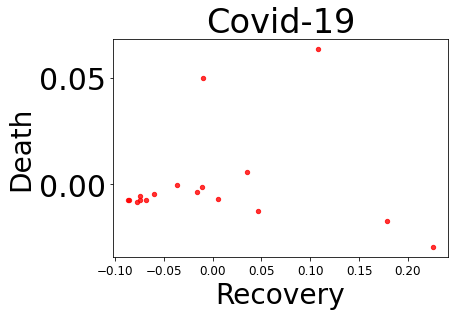

In [274]:
# Plotting Clusters

area = np.pi*6
x = principleDf_Array[:,[0]].tolist()
y = principleDf_Array[:,[1]].tolist()
print(x)
# Plot
plt.scatter(x, y, s=area, c='red', alpha=0.8)
plt.title('Covid-19')
plt.xlabel('Recovery')
plt.ylabel('Death')
plt.show()

([[-0.0745095376265721], [-0.06815518684176267], [-0.08613271462953233], [-0.07724179241104026], [-0.0742296075649404], [-0.08535866864291967], [-0.060271618173888146]], [[-0.005284825151225545], [-0.007258932855797026], [-0.007346904986578879], [-0.008170615721602005], [-0.007392259043307696], [-0.007500263165540711], [-0.0046985255188322]])
([[0.1782569527722086], [0.22545108201786124]], [[-0.01718689237579337], [-0.029339964690850498]])
([[0.005379041197254398], [-0.036909539671472216], [-0.01582249512439872], [-0.010617386371291474]], [[-0.006881107447474399], [-0.0005617576622986731], [-0.0034298148543391335], [-0.0013287954864591217]])
([[0.10831241894954678]], [[0.06324333013148604]])
([[0.03488703292423593], [0.046521997887231256]], [[0.005814811220482562], [-0.012380709458866958]])


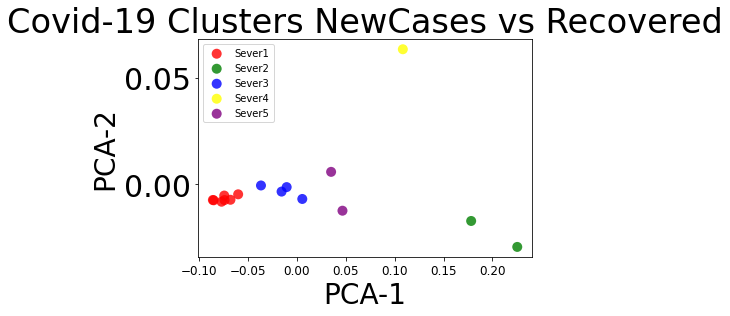

In [275]:
# Visulaize  Clusters 
title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

## Labeling Criterion for Covid Data

* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extreem 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [276]:
list(zip(selected_countries[:,[0]].tolist(),clus))

[(['Afghanistan'], 0),
 (['Italy'], 4),
 (['Kuwait'], 1),
 (['India'], 0),
 (['South Africa'], 2),
 (['US'], 3),
 (['United Kingdom'], 5),
 (['Sri Lanka'], 0),
 (['Chile'], 1),
 (['Norway'], 2),
 (['New Zealand'], 0),
 (['Switzerland'], 4),
 (['Australia'], 0),
 (['Canada'], 2),
 (['China'], 0),
 (['Slovenia'], 0),
 (['North Macedonia'], 2)]

In [277]:
s_c_df_not_norm

,0,1,2,3
0,Afghanistan,0.0126464,0.00655312,0.000364776
1,Italy,0.106957,0.0623377,0.0145118
2,Kuwait,0.211218,0.163419,0.00142857
3,India,0.0166584,0.0118621,0.000339129
4,South Africa,0.0766102,0.0544294,0.00149727
5,US,0.200965,0.0575592,0.00857608
6,United Kingdom,0.0967107,0.000459594,0.0131058
7,Sri Lanka,0.00200813,0.00144772,9.34012e-06
8,Chile,0.242137,0.201151,0.00531492
9,Norway,0.0459509,0.0246265,0.00110681


# Co-morbidities Dataframe Clustering

In [19]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia'] #US

## HIV

In [20]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '6500' '6900' '6700']
 ['Italy' '130000' '130000' '130000']
 ['Kuwait' '600' '640' '620']
 ['India' '0' '0' '0']
 ['South Africa' '7300000' '7500000' '7400000']
 ['US' '0' '0' '0']
 ['United Kingdom' '100000' '50000' '50000']
 ['Sri Lanka' '3500' '3400' '3450']
 ['Chile' '66000' '71000' '68500']
 ['Norway' '5700' '5800' '5750']
 ['New Zealand' '3500' '3600' '3550']
 ['Switzerland' '0' '0' '0']
 ['Australia' '27000' '28000' '27500']
 ['Canada' '0' '0' '0']
 ['China' '0' '0' '0']
 ['Slovenia' '0' '0' '0']
 ['North Macedonia' '500' '500' '500']]


In [21]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))
print(hiv_frame)
print("-------------------------cluster data wise---------------------------------------")
hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(hiv_frame1)
print("-------------------------------------------------------------------------------")
print(hiv_frame2)
pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

[('Afghanistan', 4), ('Italy', 2), ('Kuwait', 4), ('India', 4), ('South Africa', 1), ('US', 4), ('United Kingdom', 3), ('Sri Lanka', 4), ('Chile', 3), ('Norway', 4), ('New Zealand', 4), ('Switzerland', 4), ('Australia', 0), ('Canada', 4), ('China', 4), ('Slovenia', 4), ('North Macedonia', 4)]
-------------------------cluster data wise---------------------------------------
[(['6900'], ['6700'], 4), (['130000'], ['130000'], 2), (['640'], ['620'], 4), (['0'], ['0'], 4), (['7500000'], ['7400000'], 1), (['0'], ['0'], 4), (['50000'], ['50000'], 3), (['3400'], ['3450'], 4), (['71000'], ['68500'], 3), (['5800'], ['5750'], 4), (['3600'], ['3550'], 4), (['0'], ['0'], 4), (['28000'], ['27500'], 0), (['0'], ['0'], 4), (['0'], ['0'], 4), (['0'], ['0'], 4), (['500'], ['500'], 4)]
-------------------------------------------------------------------------------
[(['6500'], ['6900'], ['6700'], 4), (['130000'], ['130000'], ['130000'], 2), (['600'], ['640'], ['620'], 4), (['0'], ['0'], ['0'], 4), (['7300

<ipython-input-21-be1353bed4e1>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])


,val1,val2,val3,cluster
0,[6500],[6900],[6700],4
1,[130000],[130000],[130000],2
2,[600],[640],[620],4
3,[0],[0],[0],4
4,[7300000],[7500000],[7400000],1
5,[0],[0],[0],4
6,[100000],[50000],[50000],3
7,[3500],[3400],[3450],4
8,[66000],[71000],[68500],3
9,[5700],[5800],[5750],4


In [22]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
hiv_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
hiv_frame1

[([-774282.1181489271], [-2747.0396527602074], 4),
 ([-560736.7940639998], [-399.39791973305034], 2),
 ([-784815.17636855], [-2627.9076825613506], 4),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([12032066.646906517], [-286.50936933652775], 1),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([-670823.9642938524], [39338.09422633679], 3),
 ([-779914.887454488], [-2493.1001490279996], 4),
 ([-667211.6801646053], [-4539.92140996415], 3),
 ([-775929.837400817], [-2577.6426691058896], 4),
 ([-779740.1105300037], [-2615.1158882170303], 4),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([-738252.9695807832], [-2763.9046013352245], 0),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([-785889.297152316], [-2613.7245035720457], 4),
 ([-785023.3259865914], [-2605.2078628649324], 4)]

([[-738252.9695807832]], [[-2763.9046013352245]])
([[12032066.646906517]], [[-286.50936933652775]])
([[-560736.7940639998]], [[-399.39791973305034]])
([[-670823.9642938524], [-667211.6801646053]], [[39338.09422633679], [-4539.92140996415]])
([[-774282.1181489271], [-784815.17636855], [-785889.297152316], [-785889.297152316], [-779914.887454488], [-775929.837400817], [-779740.1105300037], [-785889.297152316], [-785889.297152316], [-785889.297152316], [-785889.297152316], [-785023.3259865914]], [[-2747.0396527602074], [-2627.9076825613506], [-2613.7245035720457], [-2613.7245035720457], [-2493.1001490279996], [-2577.6426691058896], [-2615.1158882170303], [-2613.7245035720457], [-2613.7245035720457], [-2613.7245035720457], [-2613.7245035720457], [-2605.2078628649324]])


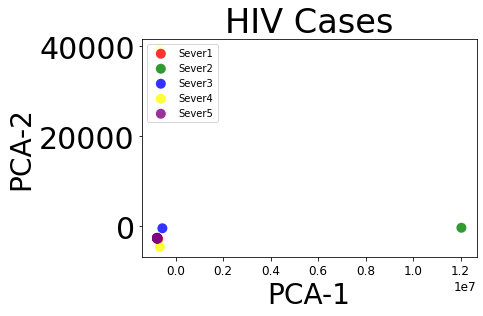

In [23]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Blood Pressure

In [24]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]
BP_Male_Data

,Country,ISO,Sex,Year,Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
40,Afghanistan,AFG,Men,2015,0.304321,0.204383,0.416141
81,Albania,ALB,Men,2015,0.330165,0.230231,0.442906
122,Algeria,DZA,Men,2015,0.254158,0.170690,0.351744
163,American Samoa,ASM,Men,2015,0.243653,0.151746,0.357891
204,Andorra,AND,Men,2015,0.231990,0.143218,0.334658
...,...,...,...,...,...,...,...
8035,Venezuela,VEN,Men,2015,0.215042,0.138169,0.304783
8076,Viet Nam,VNM,Men,2015,0.250457,0.167932,0.340519
8117,Yemen,YEM,Men,2015,0.298834,0.195063,0.415926
8158,Zambia,ZMB,Men,2015,0.276252,0.181244,0.384686


In [25]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]
print(data_bp)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------MALE DATA-------------------------------------------------")
print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]
print(data_bp)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------Female DATA-------------------------------------------------")
print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'AFG' 'Men' ... 0.30432115688142897 0.204382867902753
  0.41614109712646]
 ['Albania' 'ALB' 'Men' ... 0.330165053351833 0.230231468598675
  0.44290572570014497]
 ['Algeria' 'DZA' 'Men' ... 0.254158233914663 0.170689953685987
  0.35174417362209404]
 ...
 ['Yemen' 'YEM' 'Men' ... 0.29883400163172497 0.195062813406127
  0.415925866588648]
 ['Zambia' 'ZMB' 'Men' ... 0.276251824994491 0.181244487212415
  0.384686242743044]
 ['Zimbabwe' 'ZWE' 'Men' ... 0.26904083790058103 0.174749712256814
  0.3736806975537621]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.30432115688142897' '0.204382867902753'
  '0.41614109712646']
 ['Italy' '0.251855487351606' '0.17164683970584302' '0.335534497116277']
 ['Kuwait' '0.25542263239457297' '0.17228006314540195'
  '0.34900545036403297']
 ['India' '0.265892806879322' '0.202463552962243' '0.33694512994412']
 ['South Africa' '0.273667687805678' '0.19553429437116696'
  '0.36225

In [26]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    print(BP_frame)
    print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    print(BP_frame1)
    return BP_frame1 , BP_frame
BP_frame1_male , BP_frame_male = cluster_diabetes(selected_countries_male)
BP_frame1_female , BP_frame_female= cluster_diabetes(selected_countries_female)

[('Afghanistan', 1), ('Italy', 3), ('Kuwait', 3), ('India', 3), ('South Africa', 3), ('US', 2), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 3), ('New Zealand', 2), ('Switzerland', 0), ('Australia', 2), ('Canada', 2), ('China', 0), ('Slovenia', 4), ('North Macedonia', 1)]
-------------------------cluster data wise---------------------------------------
[(['0.204382867902753'], ['0.41614109712646'], 1), (['0.17164683970584302'], ['0.335534497116277'], 3), (['0.17228006314540195'], ['0.34900545036403297'], 3), (['0.202463552962243'], ['0.33694512994412'], 3), (['0.19553429437116696'], ['0.362253597323481'], 3), (['0.103716887089628'], ['0.218325215579095'], 2), (['0.129972048840661'], ['0.232330620437018'], 2), (['0.141745199574373'], ['0.336065893771505'], 0), (['0.168738010358718'], ['0.34919704349764'], 3), (['0.16271005617050802'], ['0.334706008777435'], 3), (['0.129064057532526'], ['0.266881080498668'], 2), (['0.14733799168667006'], ['0.310721779542206'], 0), ([

In [27]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
BP_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
BP_frame1_female

[([0.22156547058859297], [-0.0019650912136727453], 4),
 ([-0.02414287616324384], [0.0005689491265433475], 2),
 ([0.0358202718035504], [-0.001247223945102671], 4),
 ([0.10607295458672504], [0.0290046968465205], 4),
 ([0.13294827379596705], [0.01434860333712021], 1),
 ([-0.1381380027813874], [0.004091329968672212], 4),
 ([-0.11259015441141029], [0.01580939522982843], 3),
 ([0.0670176426140358], [-0.018581260930545497], 4),
 ([-0.02742868320270968], [-0.007879243193966184], 3),
 ([-0.06211588814154792], [-0.006197238154349336], 4),
 ([-0.08638332792936942], [-0.0013813973055673081], 4),
 ([-0.08030252178421288], [-0.004450139166866083], 4),
 ([-0.10584164186933655], [0.001717932417188688], 0),
 ([-0.13141025925427754], [-0.006609771031490847], 4),
 ([-0.02715810591815923], [0.00478681076394627], 4),
 ([0.12252955396325023], [-0.009440637624130147], 4),
 ([0.10955729410353382], [-0.012575715124129028], 4)]

([[-0.10585650385331881]], [[0.0019464963552530935]])
([[0.0591730964059511]], [[0.01005182874013331]])
([[0.017910473042048247]], [[0.003234995310353701]])
([[-0.1139353354533835], [0.027574520023841326]], [[0.0187118300883467], [-0.0068112694461564625]])
([[0.11867975832524376], [0.02982646425218192], [0.03952329440730583], [-0.1496648201220933], [-0.006189621833556985], [0.01012695007323388], [-0.08190970880288262], [-0.026081030998753786], [-0.1437929821357474], [-0.043123026544220455], [0.2107015952316285], [0.15703687798252242]], [[-0.0094446101146501], [-0.003621474000310878], [0.029099849467756747], [0.0016502333745045867], [-0.02443976689760328], [-0.004409034293948314], [-4.89203062086081e-05], [-0.006309942300600018], [-0.014170895951054628], [0.004529994151639995], [0.00142514940739104], [-0.0013944635848476845]])


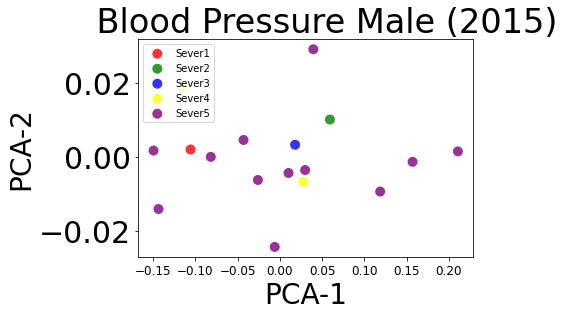

([[-0.10584164186933655]], [[0.001717932417188688]])
([[0.13294827379596705]], [[0.01434860333712021]])
([[-0.02414287616324384]], [[0.0005689491265433475]])
([[-0.11259015441141029], [-0.02742868320270968]], [[0.01580939522982843], [-0.007879243193966184]])
([[0.22156547058859297], [0.0358202718035504], [0.10607295458672504], [-0.1381380027813874], [0.0670176426140358], [-0.06211588814154792], [-0.08638332792936942], [-0.08030252178421288], [-0.13141025925427754], [-0.02715810591815923], [0.12252955396325023], [0.10955729410353382]], [[-0.0019650912136727453], [-0.001247223945102671], [0.0290046968465205], [0.004091329968672212], [-0.018581260930545497], [-0.006197238154349336], [-0.0013813973055673081], [-0.004450139166866083], [-0.006609771031490847], [0.00478681076394627], [-0.009440637624130147], [-0.012575715124129028]])


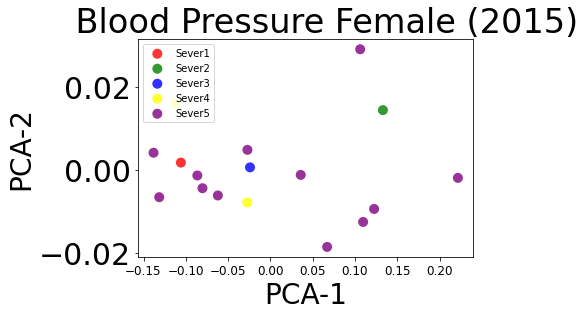

In [28]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

## Diabetes

In [29]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
Diabetes_Male_Data

,Country,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
34,Afghanistan,Men,2014,0.115657,0.064099,0.181914
69,Albania,Men,2014,0.076879,0.038768,0.130538
104,Algeria,Men,2014,0.122648,0.074322,0.188026
139,American Samoa,Men,2014,0.308217,0.191112,0.436937
174,Andorra,Men,2014,0.080856,0.042523,0.135115
...,...,...,...,...,...,...
6859,Venezuela,Men,2014,0.099361,0.052731,0.157218
6894,Viet Nam,Men,2014,0.055387,0.028874,0.091774
6929,Yemen,Men,2014,0.125920,0.066533,0.205520
6964,Zambia,Men,2014,0.064647,0.032623,0.110546


In [30]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]
print(data_diabetes)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------MALE DATA-------------------------------------------------")
print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]
print(data_diabetes)
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
print("-----------------------------------------Female DATA-------------------------------------------------")
print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'Men' 2014 0.115657280438063 0.0640989369903711
  0.18191379430512306]
 ['Albania' 'Men' 2014 0.0768787065262333 0.0387682805776147
  0.13053794979630198]
 ['Algeria' 'Men' 2014 0.122647582827742 0.0743218153722432
  0.188025758603392]
 ...
 ['Yemen' 'Men' 2014 0.12591963401798598 0.0665325354547242
  0.20552018398348604]
 ['Zambia' 'Men' 2014 0.064647058833324 0.032622844435312
  0.110545641393193]
 ['Zimbabwe' 'Men' 2014 0.0651377446270955 0.0313399430262513
  0.115730499206471]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.115657280438063' '0.0640989369903711'
  '0.18191379430512306']
 ['Italy' '0.070540891144998' '0.0390557166601463' '0.111994432949267']
 ['Kuwait' '0.19659365448643495' '0.128437913333102' '0.280923396162734']
 ['India' '0.0905389299901901' '0.0519135364345059' '0.141733485003068']
 ['South Africa' '0.096665809716039' '0.049477297985462985'
  '0.162597608684157']
 ['US' '0.081

In [31]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    print(DB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    print(DB_frame1)
    return DB_frame1,DB_frame
Diabetes_frame1_male,Diabetes_frame_male = cluster_diabetes(selected_countries_male)
Diabetes_frame1_female,Diabetes_frame_female = cluster_diabetes(selected_countries_female)

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India', 3), ('South Africa', 3), ('US', 0), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]
-------------------------cluster data wise---------------------------------------
[(['0.0640989369903711'], ['0.18191379430512306'], 2), (['0.0390557166601463'], ['0.111994432949267'], 0), (['0.128437913333102'], ['0.280923396162734'], 1), (['0.0519135364345059'], ['0.141733485003068'], 3), (['0.049477297985462985'], ['0.162597608684157'], 3), (['0.04917663608338299'], ['0.12688300699918198'], 0), (['0.0410463467920604'], ['0.0973914102554907'], 4), (['0.0361244069778972'], ['0.120125676193149'], 0), (['0.0550617357823444'], ['0.162467681408099'], 3), (['0.033379929258764'], ['0.101313143238934'], 4), (['0.0430837658559384'], ['0.127178369389441'], 0), (['0.0282416047898997'], ['0.0893571252370888

In [32]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
Diabetes_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
Diabetes_frame1_female

[([0.08388978309173556], [-0.00437381076501953], 4),
 ([-0.058283983273038666], [0.002239895476608813], 2),
 ([0.21285800893146778], [0.014631063501225129], 4),
 ([0.009218014048259848], [0.0015324787027614368], 4),
 ([0.09645669848622855], [-0.010897865856247673], 1),
 ([-0.02588340328809474], [0.004254748697687302], 4),
 ([-0.055764698463646636], [0.008133625878210211], 3),
 ([0.0036756472318293636], [-0.006313874071703848], 4),
 ([0.059464009543161965], [-0.004337062128106199], 3),
 ([-0.07231860314837087], [0.0020413959834463245], 4),
 ([-0.03268501359770465], [0.0014972155723237473], 4),
 ([-0.09317015240377356], [0.004017632487355262], 4),
 ([-0.05261656251864444], [0.004961926981485397], 0),
 ([-0.05533079495896904], [0.001189136657172132], 4),
 ([-0.0006983353788882106], [-0.0011514061472227956], 4),
 ([-0.007583457849802675], [-0.009247229009360538], 4),
 ([-0.011227156451749706], [-0.008177871960615094], 4)]

([[-0.03752209267981381]], [[0.005669391766130497]])
([[0.02571424144475481]], [[-0.011200654504926561]])
([[-0.030429648093230184]], [[0.002918427709675577]])
([[-0.043031128339436765], [0.030384282484083525]], [[0.011707289264425083], [-0.005461303366036446]])
([[0.05601730473213894], [0.19844768765627233], [0.007598555609925424], [-0.00940086856058162], [-0.025583821486247056], [-0.04508150441208642], [-0.012887032749843758], [-0.06103345572108653], [-0.04386199236993954], [0.02545494579659106], [-0.019844658531426293], [-0.014940814780074429]], [[-0.0059104572301819855], [0.008407495094828767], [0.0010687739953752296], [0.0051144719565605614], [-0.004150760270491957], [0.0024620826300137716], [-0.00044326486356894993], [0.0028703595903287285], [0.001555750729979118], [-0.0012008598884460362], [-0.007064170248532814], [-0.006342572365132509]])


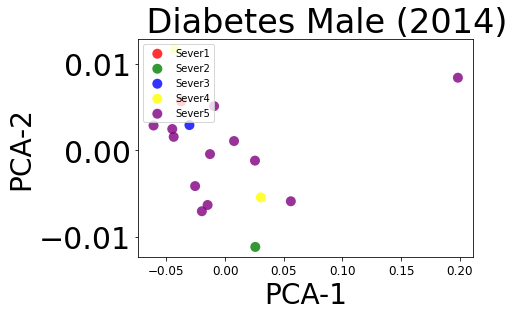

([[-0.05261656251864444]], [[0.004961926981485397]])
([[0.09645669848622855]], [[-0.010897865856247673]])
([[-0.058283983273038666]], [[0.002239895476608813]])
([[-0.055764698463646636], [0.059464009543161965]], [[0.008133625878210211], [-0.004337062128106199]])
([[0.08388978309173556], [0.21285800893146778], [0.009218014048259848], [-0.02588340328809474], [0.0036756472318293636], [-0.07231860314837087], [-0.03268501359770465], [-0.09317015240377356], [-0.05533079495896904], [-0.0006983353788882106], [-0.007583457849802675], [-0.011227156451749706]], [[-0.00437381076501953], [0.014631063501225129], [0.0015324787027614368], [0.004254748697687302], [-0.006313874071703848], [0.0020413959834463245], [0.0014972155723237473], [0.004017632487355262], [0.001189136657172132], [-0.0011514061472227956], [-0.009247229009360538], [-0.008177871960615094]])


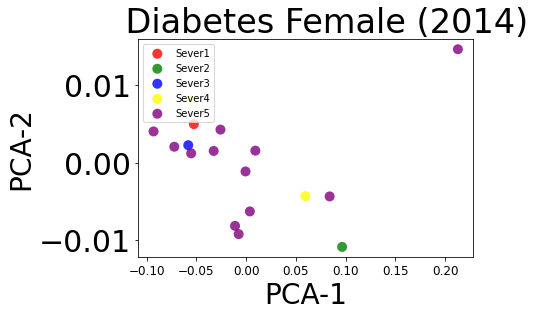

In [33]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Tuber Culosis

In [34]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


print(selected_countries[:,[0,1,2]])

[['Afghanistan' '5122' '22528']
 ['Italy' '642' '3918']
 ['Kuwait' '175' '621']
 ['India' '274316' '1266364']
 ['South Africa' '58840' '176602']
 ['US' '6646' '17812']
 ['United Kingdom' '1158' '6938']
 ['Sri Lanka' '1759' '7708']
 ['Chile' '637' '4170']
 ['Norway' '65' '298']
 ['New Zealand' '67' '340']
 ['Switzerland' '129' '755']
 ['Australia' '260' '1113']
 ['Canada' '958' '1873']
 ['China' '147180' '536799']
 ['Slovenia' '59' '470']
 ['North Macedonia' '80' '409']]


In [35]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
print(TB_frame)
print("-------------------------cluster data wise---------------------------------------")
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))
print(TB_frame1)

[('Afghanistan', 4), ('Italy', 0), ('Kuwait', 0), ('India', 1), ('South Africa', 3), ('US', 4), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Australia', 0), ('Canada', 0), ('China', 2), ('Slovenia', 0), ('North Macedonia', 0)]
-------------------------cluster data wise---------------------------------------
[(['5122'], ['22528'], 4), (['642'], ['3918'], 0), (['175'], ['621'], 0), (['274316'], ['1266364'], 1), (['58840'], ['176602'], 3), (['6646'], ['17812'], 4), (['1158'], ['6938'], 0), (['1759'], ['7708'], 0), (['637'], ['4170'], 0), (['65'], ['298'], 0), (['67'], ['340'], 0), (['129'], ['755'], 0), (['260'], ['1113'], 0), (['958'], ['1873'], 0), (['147180'], ['536799'], 2), (['59'], ['470'], 0), (['80'], ['409'], 0)]


In [36]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
TB_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
TB_frame1



[([-100902.11564606804], [-2084.339970562509], 4),
 ([-120041.61277670779], [-2370.957461718426], 0),
 ([-123360.72445026576], [-2103.0102683175714], 0),
 ([1171688.3330782494], [-12426.213477823454], 1),
 ([61204.75915993331], [16510.8782489523], 3),
 ([-105168.68745570185], [437.48416946771084], 4),
 ([-116981.99462619968], [-2530.3085617493543], 0),
 ([-116098.87025857944], [-2112.944989650162], 0),
 ([-119796.8535100867], [-2431.1396966643924], 0),
 ([-123699.99082517158], [-2139.4427656005237], 0),
 ([-123658.5758083918], [-2146.7088777060385], 0),
 ([-123240.08639242596], [-2177.2965995006375], 0),
 ([-122862.06459421657], [-2128.057183596846], 0),
 ([-121967.40873951053], [-1613.8637359137763], 0),
 ([432007.79851660016], [23648.133523789802], 2),
 ([-123533.50072437919], [-2183.0437557055707], 0),
 ([-123588.4049470778], [-2149.1685977005905], 0)]

([[-120041.61277670779], [-123360.72445026576], [-116981.99462619968], [-116098.87025857944], [-119796.8535100867], [-123699.99082517158], [-123658.5758083918], [-123240.08639242596], [-122862.06459421657], [-121967.40873951053], [-123533.50072437919], [-123588.4049470778]], [[-2370.957461718426], [-2103.0102683175714], [-2530.3085617493543], [-2112.944989650162], [-2431.1396966643924], [-2139.4427656005237], [-2146.7088777060385], [-2177.2965995006375], [-2128.057183596846], [-1613.8637359137763], [-2183.0437557055707], [-2149.1685977005905]])
([[1171688.3330782494]], [[-12426.213477823454]])
([[432007.79851660016]], [[23648.133523789802]])
([[61204.75915993331]], [[16510.8782489523]])
([[-100902.11564606804], [-105168.68745570185]], [[-2084.339970562509], [437.48416946771084]])


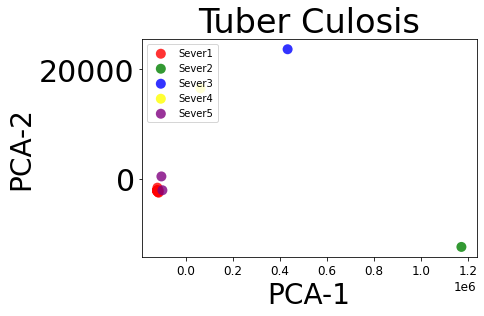

In [37]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending

In [279]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# Medical Expending
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '60' '61' '67']
 ['Italy' '2708' '2736' '2840']
 ['Kuwait' '1168' '1072' '1529']
 ['India' '58' '60' '69']
 ['South Africa' '470' '428' '499']
 ['US' '9538' '9941' '10246']
 ['United Kingdom' '4326' '3945' '3858']
 ['Sri Lanka' '151' '153' '159']
 ['Chile' '1140' '1190' '1381']
 ['Norway' '7565' '7496' '7936']
 ['New Zealand' '3582' '3745' '3937']
 ['Switzerland' '9807' '9835' '9956']
 ['Australia' '4887' '4999' '5331']
 ['Canada' '4539' '4518' '4754']
 ['China' '392' '398' '440']
 ['Slovenia' '1775' '1834' '1920']
 ['North Macedonia' '306' '327' '328']]


In [288]:
clustering = KMeans(n_clusters=7, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
print(medical_expend_frame)
print("-------------------------cluster data wise---------------------------------------")
medical_expend_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(medical_expend_frame1)

[('Afghanistan', 3), ('Italy', 6), ('Kuwait', 1), ('India', 3), ('South Africa', 3), ('US', 0), ('United Kingdom', 4), ('Sri Lanka', 3), ('Chile', 1), ('Norway', 5), ('New Zealand', 4), ('Switzerland', 0), ('Australia', 2), ('Canada', 2), ('China', 3), ('Slovenia', 1), ('North Macedonia', 3)]
-------------------------cluster data wise---------------------------------------
[(['61'], ['67'], 3), (['2736'], ['2840'], 6), (['1072'], ['1529'], 1), (['60'], ['69'], 3), (['428'], ['499'], 3), (['9941'], ['10246'], 0), (['3945'], ['3858'], 4), (['153'], ['159'], 3), (['1190'], ['1381'], 1), (['7496'], ['7936'], 5), (['3745'], ['3937'], 4), (['9835'], ['9956'], 0), (['4999'], ['5331'], 2), (['4518'], ['4754'], 2), (['398'], ['440'], 3), (['1834'], ['1920'], 1), (['327'], ['328'], 3)]


In [289]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
medical_expend_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
medical_expend_frame1


[([-5342.130767676922], [27.913988326413996], 3),
 ([-667.046471544938], [11.653029349198745], 6),
 ([-3270.5759844381687], [-187.44195480056672], 1),
 ([-5342.662880442611], [25.08898099278928], 3),
 ([-4643.867525351872], [23.696710135877705], 3),
 ([11716.5439885926], [-206.69388966189896], 0),
 ([1546.2625856545385], [471.143749449776], 4),
 ([-5183.36852062691], [29.636476355083513], 3),
 ([-3305.7119593414322], [-105.52219482883879], 1),
 ([7829.451121623776], [-24.494013623378642], 5),
 ([1055.6340399308679], [-119.88160940013803], 4),
 ([11637.316269945122], [188.48037438673913], 0),
 ([3338.7544359812155], [-146.68144935583], 2),
 ([2524.6402565460153], [2.97520823714617], 2),
 ([-4740.132263933793], [8.337065033055016], 3),
 ([-2257.355443673128], [-22.219819122434227], 1),
 ([-4895.750881244359], [24.009348527008843], 3)]

([[11716.5439885926], [11637.316269945122]], [[-206.69388966189896], [188.48037438673913]])
([[-3270.5759844381687], [-3305.7119593414322], [-2257.355443673128]], [[-187.44195480056672], [-105.52219482883879], [-22.219819122434227]])
([[3338.7544359812155], [2524.6402565460153]], [[-146.68144935583], [2.97520823714617]])
([[-5342.130767676922], [-5342.662880442611], [-4643.867525351872], [-5183.36852062691], [-4740.132263933793], [-4895.750881244359]], [[27.913988326413996], [25.08898099278928], [23.696710135877705], [29.636476355083513], [8.337065033055016], [24.009348527008843]])
([[1546.2625856545385], [1055.6340399308679]], [[471.143749449776], [-119.88160940013803]])


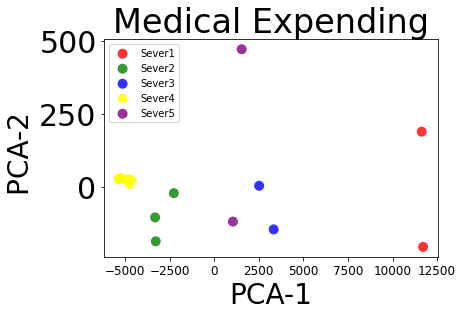

In [290]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = 'PCA-1'
ylabel = 'PCA-2 '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

In [293]:
list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))

[(['Afghanistan'], ['61'], ['67'], 3),
 (['Italy'], ['2736'], ['2840'], 6),
 (['Kuwait'], ['1072'], ['1529'], 1),
 (['India'], ['60'], ['69'], 3),
 (['South Africa'], ['428'], ['499'], 3),
 (['US'], ['9941'], ['10246'], 0),
 (['United Kingdom'], ['3945'], ['3858'], 4),
 (['Sri Lanka'], ['153'], ['159'], 3),
 (['Chile'], ['1190'], ['1381'], 1),
 (['Norway'], ['7496'], ['7936'], 5),
 (['New Zealand'], ['3745'], ['3937'], 4),
 (['Switzerland'], ['9835'], ['9956'], 0),
 (['Australia'], ['4999'], ['5331'], 2),
 (['Canada'], ['4518'], ['4754'], 2),
 (['China'], ['398'], ['440'], 3),
 (['Slovenia'], ['1834'], ['1920'], 1),
 (['North Macedonia'], ['327'], ['328'], 3)]

## Cluste Labeling 

* Cluster 0 ------> Severity 0 Highest expending country 
* Cluster 1 ------> Severity 6 Lower  expending country
* Cluster 2 ------> Severity 3 High epending country  
* Cluster 3 ------> Severity 7 Lowest expending country
* Cluster 4 ------> Severity 4 upper medium expending country
* Cluster 5 ------> Severity 1 second Highest expending country 
* Cluster 6 ------> Severity 5 medium expending country


## Listing all the Clusters of Comorbidites

In [42]:
print("Covid-->\n")
print(covid_frame)
print("\nHIV-->\n")
print(hiv_frame)
print("\nDiabetes Male-->\n")
print(Diabetes_frame_male)
print("\nDiabetes Female-->\n")
print(Diabetes_frame_female)
print("\nBP Male-->\n")
print(BP_frame_male)
print("\nBP Female-->\n")
print(BP_frame_female)
print("\nTB-->\n")
print(TB_frame)
print("\nMedical-->\n")
print(medical_expend_frame)

Covid-->

[('Afghanistan', 0), ('Italy', 3), ('Kuwait', 0), ('India', 2), ('South Africa', 3), ('US', 1), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Australia', 0), ('Canada', 0), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]

HIV-->

[('Afghanistan', 4), ('Italy', 2), ('Kuwait', 4), ('India', 4), ('South Africa', 1), ('US', 4), ('United Kingdom', 3), ('Sri Lanka', 4), ('Chile', 3), ('Norway', 4), ('New Zealand', 4), ('Switzerland', 4), ('Australia', 0), ('Canada', 4), ('China', 4), ('Slovenia', 4), ('North Macedonia', 4)]

Diabetes Male-->

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India', 3), ('South Africa', 3), ('US', 0), ('United Kingdom', 4), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0)]

Diabetes Female-->

[('Afghanistan', 2), ('Italy', 0), ('Kuwait', 1), ('India',

# Main Cluster for Prediction

## Main Mega Frame Formation

In [43]:
final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15]]
#TB_frame

In [44]:
print(final_frame)

[['Afghanistan' '0' '4' '2' '2' '1' '3' '4' '0']
 ['Italy' '3' '2' '0' '0' '3' '2' '0' '4']
 ['Kuwait' '0' '4' '1' '1' '3' '4' '0' '4']
 ['India' '2' '4' '3' '3' '3' '1' '1' '0']
 ['South Africa' '3' '1' '3' '2' '3' '1' '3' '0']
 ['US' '1' '4' '0' '0' '2' '0' '4' '3']
 ['United Kingdom' '4' '3' '4' '0' '2' '0' '0' '2']
 ['Sri Lanka' '0' '4' '0' '3' '0' '4' '0' '0']
 ['Chile' '3' '3' '3' '2' '3' '2' '0' '4']
 ['Norway' '0' '4' '4' '4' '3' '2' '0' '1']
 ['New Zealand' '0' '4' '0' '0' '2' '0' '0' '2']
 ['Switzerland' '0' '4' '4' '4' '0' '0' '0' '3']
 ['Australia' '0' '0' '4' '0' '2' '0' '0' '2']
 ['Canada' '0' '4' '4' '0' '2' '0' '0' '2']
 ['China' '3' '4' '3' '3' '0' '2' '2' '0']
 ['Slovenia' '0' '4' '0' '3' '4' '1' '0' '4']
 ['North Macedonia' '0' '4' '0' '3' '1' '1' '0' '0']]


In [45]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))
print(final_Clus_frame)
final_Clus_frame1 = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))
print(final_Clus_frame1)

[('Afghanistan', 2), ('Italy', 1), ('Kuwait', 1), ('India', 0), ('South Africa', 0), ('US', 1), ('United Kingdom', 3), ('Sri Lanka', 2), ('Chile', 3), ('Norway', 4), ('New Zealand', 1), ('Switzerland', 4), ('Australia', 4), ('Canada', 4), ('China', 0), ('Slovenia', 1), ('North Macedonia', 2)]
[(['0'], ['4'], 2), (['3'], ['2'], 1), (['0'], ['4'], 1), (['2'], ['4'], 0), (['3'], ['1'], 0), (['1'], ['4'], 1), (['4'], ['3'], 3), (['0'], ['4'], 2), (['3'], ['3'], 3), (['0'], ['4'], 4), (['0'], ['4'], 1), (['0'], ['4'], 4), (['0'], ['0'], 4), (['0'], ['4'], 4), (['3'], ['4'], 0), (['0'], ['4'], 1), (['0'], ['4'], 2)]


In [46]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = final_frame[:,[1,2,3,4,5,6,7,8]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
final_Clus_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
final_Clus_frame1

[([3.0959629448333614], [0.06607900638181653], 2),
 ([-3.3611258176274905], [1.4739865716827285], 1),
 ([-1.1187587634823448], [3.0140041370197], 1),
 ([1.322863191093468], [-1.501932184097888], 0),
 ([0.1837095106634514], [-3.0081897069624164], 0),
 ([-1.117879314874183], [1.339968000045737], 1),
 ([-2.2922293169676853], [-2.901104654861904], 3),
 ([3.4070774750102575], [2.336969621642092], 2),
 ([-2.0458515052326964], [-0.5119994186679115], 3),
 ([1.728212894246914], [-0.7508914915417505], 4),
 ([-1.1432622306171025], [1.9612165604661664], 1),
 ([1.0545530263648832], [-0.8777340775083629], 4),
 ([-2.2501720401478145], [-2.188333084791527], 4),
 ([-1.159842586844275], [-1.0596589836666401], 4),
 ([2.641966508776016], [-1.932016955339852], 0),
 ([-1.2058939541956357], [2.9846961020392806], 1),
 ([2.2606699790008817], [1.5549405581607287], 2)]

([[1.322863191093468], [0.1837095106634514], [2.641966508776016]], [[-1.501932184097888], [-3.0081897069624164], [-1.932016955339852]])
([[-3.3611258176274905], [-1.1187587634823448], [-1.117879314874183], [-1.1432622306171025], [-1.2058939541956357]], [[1.4739865716827285], [3.0140041370197], [1.339968000045737], [1.9612165604661664], [2.9846961020392806]])
([[3.0959629448333614], [3.4070774750102575], [2.2606699790008817]], [[0.06607900638181653], [2.336969621642092], [1.5549405581607287]])
([[-2.2922293169676853], [-2.0458515052326964]], [[-2.901104654861904], [-0.5119994186679115]])
([[1.728212894246914], [1.0545530263648832], [-2.2501720401478145], [-1.159842586844275]], [[-0.7508914915417505], [-0.8777340775083629], [-2.188333084791527], [-1.0596589836666401]])


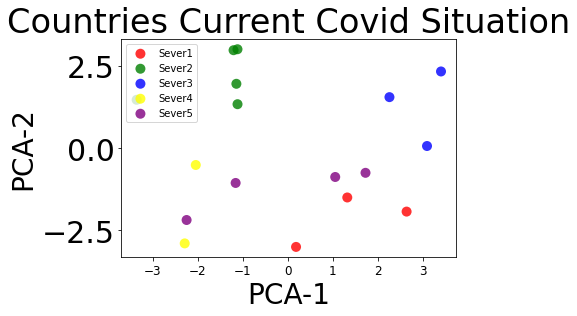

In [47]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

# Vaccine Dosage Prediction

## For Now 

### Sever 1 = 20%
### Sever 2 = 40%
### Sever 3 = 60%
### Sever 4 = 80%
### Sever 5 = 100%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [48]:
final_Clus_frame

[('Afghanistan', 2),
 ('Italy', 1),
 ('Kuwait', 1),
 ('India', 0),
 ('South Africa', 0),
 ('US', 1),
 ('United Kingdom', 3),
 ('Sri Lanka', 2),
 ('Chile', 3),
 ('Norway', 4),
 ('New Zealand', 1),
 ('Switzerland', 4),
 ('Australia', 4),
 ('Canada', 4),
 ('China', 0),
 ('Slovenia', 1),
 ('North Macedonia', 2)]

In [49]:
set(Population_Data_Countires_Wise['Country'])

{'Afghanistan',
 'Africa',
 'African Group',
 'African Union',
 'African Union: Central Africa',
 'African Union: Eastern Africa',
 'African Union: Northern Africa',
 'African Union: Southern Africa',
 'African Union: Western Africa',
 'African, Caribbean and Pacific (ACP) Group of States',
 'Albania',
 'Algeria',
 'Andean Community',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia-Pacific Economic Cooperation (APEC)',
 'Asia-Pacific Group',
 'Association of Southeast Asian Nations (ASEAN)',
 'Australia',
 'Australia/New Zealand',
 'Austria',
 'Azerbaijan',
 'BRIC',
 'BRICS',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Belt-Road Initiative (BRI)',
 'Belt-Road Initiative: Africa',
 'Belt-Road Initiative: Asia',
 'Belt-Road Initiative: Europe',
 'Belt-Road Initiative: Latin America and the Caribbean',
 'Belt-Road Initiative: Pacific',
 'Benin',
 'Bhutan',
 'Black Sea Economic Cooperation (BSEC)',
 'Boliva

In [50]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]]

array([[139.66899999999998, 154.91299999999995, 294.582],
       [131.916, 141.851, 273.767],
       [125.127, 130.632, 255.759],
       ...,
       [0.006, 0.043, 0.049],
       [0.002, 0.015, 0.017],
       [0.002, 0.018000000000000002, 0.02]], dtype=object)

In [51]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']

In [52]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]] = np.array(Population_Data_Countires_Wise_complete[:,[9,10,11]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,9]))/len(Population_Data_Countires_Wise_complete[:,[9]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,10]))/len(Population_Data_Countires_Wise_complete[:,[10]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,11]))/len(Population_Data_Countires_Wise_complete[:,[11]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['South Africa' '164' '167' '331']
 ['US' '1187' '1221' '2409']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [53]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [54]:
print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['South Africa' '164' '167' '331']
 ['US' '1187' '1221' '2409']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [55]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
print(final_Clus_frame)

[['Afghanistan' '2' '85' '80' '167']
 ['Italy' '1' '265' '280' '546']
 ['Kuwait' '1' '8' '6' '15']
 ['India' '0' '4176' '3872' '8048']
 ['South Africa' '0' '164' '167' '331']
 ['US' '1' '1187' '1221' '2409']
 ['United Kingdom' '3' '275' '290' '567']
 ['Sri Lanka' '2' '76' '75' '152']
 ['Chile' '3' '60' '61' '122']
 ['Norway' '4' '20' '20' '41']
 ['New Zealand' '1' '15' '16' '32']
 ['Switzerland' '4' '31' '32' '64']
 ['Australia' '4' '78' '78' '157']
 ['Canada' '4' '126' '127' '254']
 ['China' '0' '5287' '5004' '10292']
 ['Slovenia' '1' '8' '8' '17']
 ['North Macedonia' '2' '8' '8' '17']]


In [56]:
M_Vaccine_dosage = []
F_Vaccine_dosage = []
T_Vaccine_dosage = []

for i in final_Clus_frame:
    if int(i[1]) == 0:
        M_Vaccine_dosage.append(int(i[2])*0.2)
        F_Vaccine_dosage.append(int(i[3])*0.2)
        T_Vaccine_dosage.append(int(i[4])*0.2)
    elif int(i[1]) == 1:
        M_Vaccine_dosage.append(int(i[2])*0.4)
        F_Vaccine_dosage.append(int(i[3])*0.4)
        T_Vaccine_dosage.append(int(i[4])*0.4)
        
    elif int(i[1]) == 2:
        M_Vaccine_dosage.append(int(i[2])*0.6)
        F_Vaccine_dosage.append(int(i[3])*0.6)
        T_Vaccine_dosage.append(int(i[4])*0.6)
    elif int(i[1]) == 3:
        M_Vaccine_dosage.append(int(i[2])*0.8)
        F_Vaccine_dosage.append(int(i[3])*0.8)
        T_Vaccine_dosage.append(int(i[4])*0.8)
        
    elif int(i[1]) == 4:
        M_Vaccine_dosage.append(int(i[2])*1.0)
        F_Vaccine_dosage.append(int(i[3])*1.0)
        T_Vaccine_dosage.append(int(i[4])*1.0)


        

In [57]:
final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage

print(M_Vaccine_dosage)

print(F_Vaccine_dosage) 

print(T_Vaccine_dosage)

final_Clus_dataframe








[51.0, 106.0, 3.2, 835.2, 32.800000000000004, 474.8, 220.0, 45.6, 48.0, 20.0, 6.0, 31.0, 78.0, 126.0, 1057.4, 3.2, 4.8]
[48.0, 112.0, 2.4000000000000004, 774.4000000000001, 33.4, 488.40000000000003, 232.0, 45.0, 48.800000000000004, 20.0, 6.4, 32.0, 78.0, 127.0, 1000.8000000000001, 3.2, 4.8]
[100.2, 218.4, 6.0, 1609.6000000000001, 66.2, 963.6, 453.6, 91.2, 97.60000000000001, 41.0, 12.8, 64.0, 157.0, 254.0, 2058.4, 6.800000000000001, 10.2]


,Country,Cluster,Male_Populstion,Female_Population,Total_Population,Min_Covid_Vaccine_for_Male,Min_Covid_Vaccine_for_Female,Min_Covid_Vaccine_for_total
0,Afghanistan,2,85,80,167,51.0,48.0,100.2
1,Italy,1,265,280,546,106.0,112.0,218.4
2,Kuwait,1,8,6,15,3.2,2.4,6.0
3,India,0,4176,3872,8048,835.2,774.4,1609.6
4,South Africa,0,164,167,331,32.8,33.4,66.2
5,US,1,1187,1221,2409,474.8,488.4,963.6
6,United Kingdom,3,275,290,567,220.0,232.0,453.6
7,Sri Lanka,2,76,75,152,45.6,45.0,91.2
8,Chile,3,60,61,122,48.0,48.8,97.6
9,Norway,4,20,20,41,20.0,20.0,41.0


##  Writing the cleaned data in Cleaned Folder

In [58]:
final_Clus_dataframe.to_csv('../final_Cluster_frame.csv')

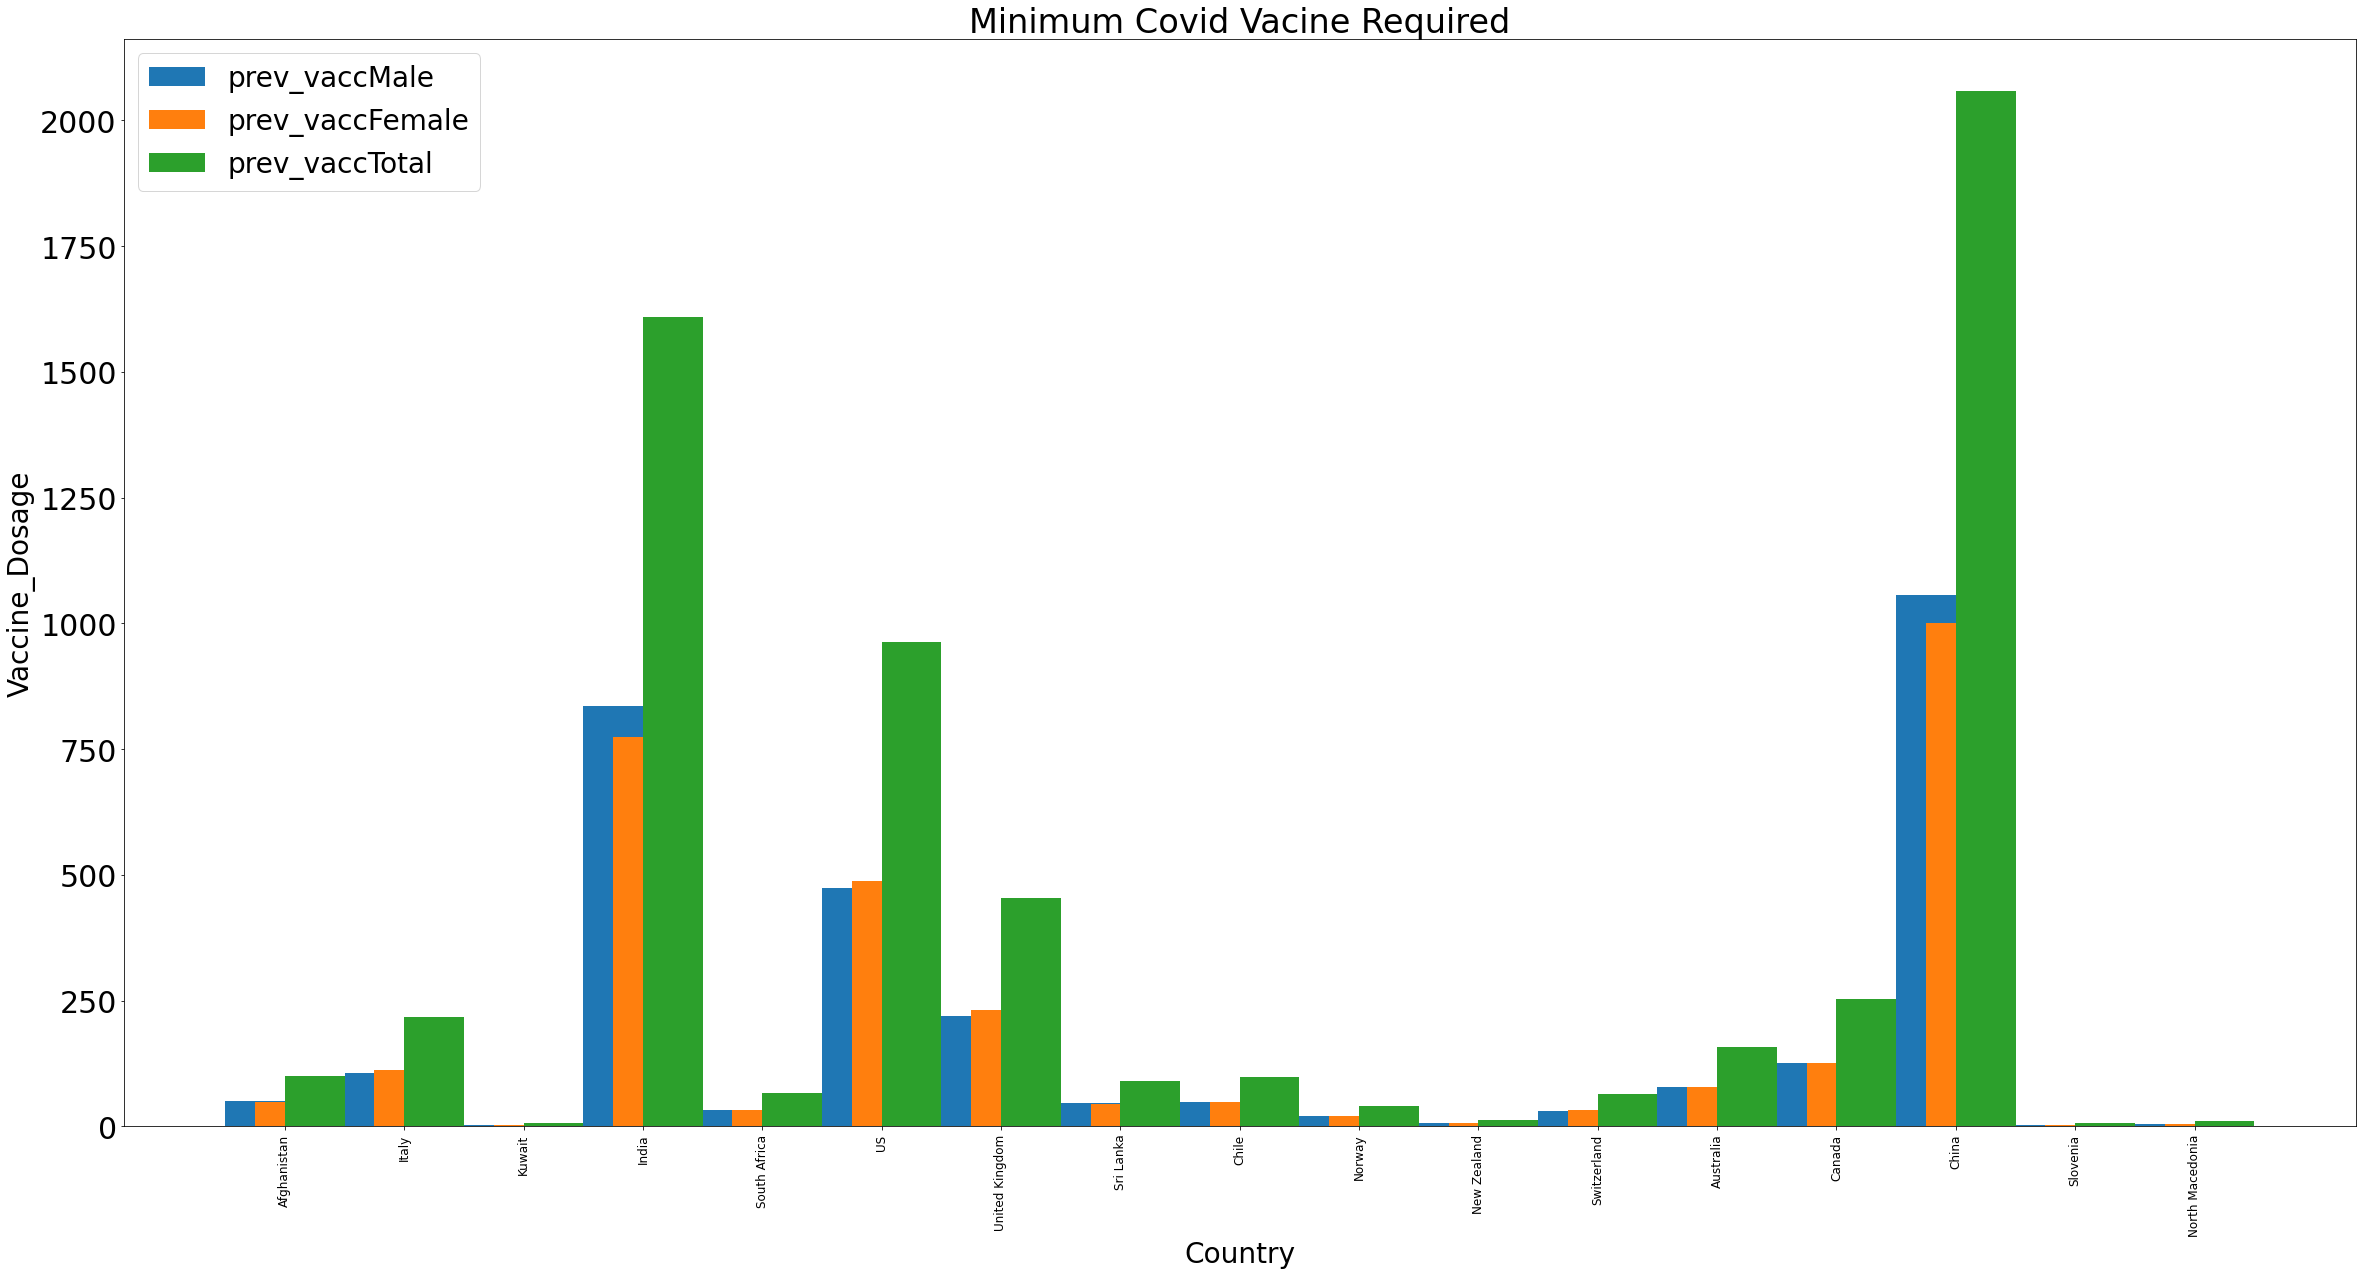

In [59]:
## Visualisation
ylab = "Vaccine_Dosage"
xlab = "Country"


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
prev_vaccTotal = df['Min_Covid_Vaccine_for_total']
        
title1 = 'Minimum Covid Vacine Required'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,20))
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()